In [1]:
# importing pytorch
import torch

In [2]:
# creating a tensor

# zero tensor
zeros = torch.zeros(5)
print(zeros)
# ones
ones = torch.ones(5)
print(ones)
# random normal
random = torch.randn(5)
print(random)

tensor([0., 0., 0., 0., 0.])
tensor([1., 1., 1., 1., 1.])
tensor([ 0.7698,  0.9093, -1.0657,  0.9910,  1.2465])


In [3]:
# multi dimenstional tensors

# 2D
two_dim = torch.randn((3, 3))
print(two_dim)
# 3D 
three_dim = torch.randn((3, 3, 3))
print(three_dim)

tensor([[ 1.9233, -0.8106,  0.6584],
        [ 0.6597, -1.2530, -0.4327],
        [ 0.4783, -0.5771, -0.0269]])
tensor([[[ 1.2619,  0.3887, -0.4687],
         [ 1.4697, -0.6286,  0.2429],
         [ 0.6868, -1.9214,  0.0605]],

        [[-2.5104, -0.4840, -0.5174],
         [ 1.2955, -1.1368, -1.1250],
         [ 2.7244, -0.9953,  0.9325]],

        [[-1.5886, -0.0409,  0.7821],
         [-0.5646,  0.7727,  0.0782],
         [ 0.7847,  1.2497,  1.0294]]])


In [4]:
# tensor shapes and axes

print(zeros.shape)
print(two_dim.shape)
print(three_dim.shape)

# zeroth axis - rows
print(two_dim[:, 0])
# first axis - columns
print(two_dim[0, :])

torch.Size([5])
torch.Size([3, 3])
torch.Size([3, 3, 3])
tensor([1.9233, 0.6597, 0.4783])
tensor([ 1.9233, -0.8106,  0.6584])


In [5]:
# some other operations

# reshape
a = torch.randn((3, 4))
print(a)
a_reshaped = a.view(2, 6)
print(a_reshaped)

# reshape with -1
a_reshaped = a.view(4, -1)
a_reshaped = a.view(-1)

# max, mean
val = torch.max(a)
print(val)
a_mean = torch.mean(a)
print(a_mean)

# along various axes
val, ind = torch.max(a, dim=0)
print(val, ind)
val, ind = torch.max(a, dim=1)
print(val, ind)

tensor([[-0.1868,  0.4295,  0.8603, -0.0783],
        [ 0.6401, -0.2413, -1.3171,  0.1292],
        [ 0.7007, -0.0085, -2.4723, -0.5202]])
tensor([[-0.1868,  0.4295,  0.8603, -0.0783,  0.6401, -0.2413],
        [-1.3171,  0.1292,  0.7007, -0.0085, -2.4723, -0.5202]])
tensor(0.8603)
tensor(-0.1721)
tensor([0.7007, 0.4295, 0.8603, 0.1292]) tensor([2, 0, 0, 1])
tensor([0.8603, 0.6401, 0.7007]) tensor([2, 0, 0])


In [6]:
# cpu-gpu
a = torch.randn((3, 4))
print(a.device)

device = torch.device("cuda")
a = a.to(device)
print(a.device)

# a more generic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

cpu
cuda:0


In [7]:
# torch to numpy

a = a.cpu().numpy()
print(type(a))

# numpy to torch
import numpy as np
a = np.ones((3, 3))
a = torch.from_numpy(a)
print(type(a))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [8]:
# basic back prop

# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 (w)
print(w.grad)    # w.grad = 1 (x)
print(b.grad)    # b.grad = 1 (1)

tensor(2.)
tensor(1.)
tensor(1.)


In [9]:
# defining layers

import torch.nn as nn

layer1 = nn.Linear(3, 3)
print(layer1)

Linear(in_features=3, out_features=3, bias=True)


In [10]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

w:  Parameter containing:
tensor([[ 0.1921, -0.0865, -0.5248],
        [-0.0609,  0.5417, -0.1734]], requires_grad=True)
b:  Parameter containing:
tensor([0.1439, 0.0565], requires_grad=True)
loss:  1.0405319929122925
dL/dw:  tensor([[ 0.6339, -0.0551, -0.1791],
        [ 0.1828,  0.9365,  0.3614]])
dL/db:  tensor([-0.1240, -0.1435])
loss after 1 step optimization:  1.0255013704299927


Files already downloaded and verified


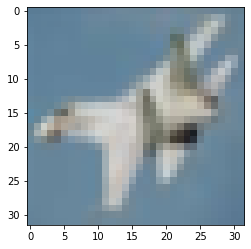

torch.Size([3, 32, 32])
0


In [11]:
from torchvision import datasets, transforms

# use existing datasets
# Download and construct CIFAR-10 dataset.
val_dataset = datasets.CIFAR10(
    root='./data/', 
    train=False, 
    transform=transforms.ToTensor(), 
    download=True
)

# Fetch one data pair (read data from disk).
image, label = val_dataset[10]
import matplotlib.pyplot as plt
plt.imshow(image.permute(1, 2, 0).numpy())
plt.show()
print(image.shape)
print(label)

In [12]:
from torch.utils.data import DataLoader
# Data loader (this provides queues and threads in a very simple way).
loader = torch.utils.data.DataLoader(
    dataset=val_dataset,
    batch_size=64, 
    shuffle=True
)

# how data is loaded in the backend
# When iteration starts, queue and thread start to load data from files.
data_iter = iter(loader)
# Mini-batch images and labels.
images, labels = data_iter.next()
print(images.shape, labels.shape)

# Usage of the data loader is as below.
for images, labels in loader:
    # Training code should be written here.
    print(images.shape, labels.shape)
    break

torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])


In [ ]:
from torch.utils.data import Dataset

# Defining a custom dataset
class CustomDataset(Dataset):
    def __init__(self):
        # 1. Initialize file paths or a list of file names. 
        pass
    def __getitem__(self, index):
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        return None
    def __len__(self):
        # return length of the dataset
        return 0 # here 0 because there are no elements

# You can then use the prebuilt data loader. 
custom_dataset = CustomDataset()
custom_loader = torch.utils.data.DataLoader(
    dataset=custom_dataset,
    batch_size=64, 
    shuffle=True
)

In [14]:
# defining models

class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        # 1. initialize all the model layers (eg: nn.Linear(), nn.Conv2d(),etc)
        self.layer1 = nn.Linear(3, 3)

    def forward(self, inp):
        # 1. pass through the required layers and perform the necessary operations
        # eg: out = self.layer1(x)
        # return final output
        out = self.layer1(inp)
        return out

model = CustomModel().to(device)
inp = torch.randn((2, 3)).to(device)
output = model(inp)
print(output)

tensor([[0.4268, 0.4466, 0.0190],
        [0.6959, 0.7932, 0.0326]], device='cuda:0', grad_fn=<AddmmBackward>)


In [15]:
# Save and load the entire model.
torch.save(model.state_dict(), 'model.ckpt')
model.load_state_dict(torch.load('model.ckpt'))

<All keys matched successfully>

## Linear regression (EXTREME OVERKILL CODE)

Epoch [1/200], Loss: 176.0230
Epoch [11/200], Loss: 118.9484
Epoch [21/200], Loss: 118.9417
Epoch [31/200], Loss: 118.9350
Epoch [41/200], Loss: 118.9283
Epoch [51/200], Loss: 118.9217
Epoch [61/200], Loss: 118.9150
Epoch [71/200], Loss: 118.9084
Epoch [81/200], Loss: 118.9018
Epoch [91/200], Loss: 118.8952
Epoch [101/200], Loss: 118.8886
Epoch [111/200], Loss: 118.8820
Epoch [121/200], Loss: 118.8755
Epoch [131/200], Loss: 118.8689
Epoch [141/200], Loss: 118.8624
Epoch [151/200], Loss: 118.8558
Epoch [161/200], Loss: 118.8493
Epoch [171/200], Loss: 118.8428
Epoch [181/200], Loss: 118.8363
Epoch [191/200], Loss: 118.8298


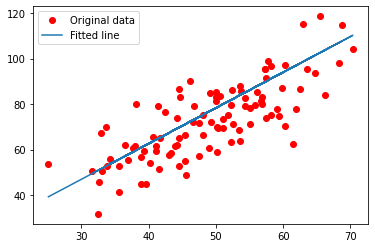

In [16]:
# SUPER UNWANTEDLY LARGE LINEAR REGRESSION CODE (HOWEVER WILL GIVE U AN OVERALL IDEA SO YEAH)

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


class XYSet(Dataset):
    def __init__(self):
        # toy dataset
        data = np.genfromtxt("https://raw.githubusercontent.com/MukundVarmaT/PythonMLworkshop/master/data.csv", delimiter=",")
        self.x, self.y = data[:,[0]], data[:, [1]]
    def __getitem__(self, indx):
        return self.x[indx], self.y[indx]
    def __len__(self):
        return len(self.x)


class LinReg(nn.Module):
    def __init__(self):
        super(LinReg, self).__init__()
        self.layer = nn.Linear(1, 1)
    def forward(self, x):
        return self.layer(x)

dset = XYSet()
loader = DataLoader(dset, batch_size=8, num_workers=4)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LinReg().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

# Train the model
for epoch in range(200):
    loss_cntr = []
    for x, y in loader:
        x, y = x.to(device).float(), y.to(device).float()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_cntr.append(loss.item())
    if epoch % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 200, np.mean(loss_cntr)))

# Plot the graph
predicted = model(torch.from_numpy(dset.x).to(device).float()).cpu().detach().numpy()
plt.plot(dset.x, dset.y, 'ro', label='Original data')
plt.plot(dset.x, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')
